# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Fecha de reporte web', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+25, int(height), fontsize=10, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+25,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=10, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

,Fecha de diagnóstico,Fecha de notificación,Fecha de inicio de síntomas,Fecha de recuperación,Fecha de defunción,Fecha de reporte web,Ciudad de ubicación,Departamento,Severidad,Estado,...,Clasificación de edad,Sexo,Pertenecia Étnica,Nombre Grupo Étnico,Tipo,Tipo de recuperación,País de procedencia,Código departamento,Código país,Código DIVIPOLA
Id de caso,,,,,,,,,,,,,,,,,,,,,
1,2020-03-06,2020-03-02,2020-02-27 00:00:00,2020-03-13,NaT,2020-03-06,Bogotá d.c.,Bogotá D.C.,Leve,Recuperado,...,10 - 20,F,Otro,NaN,Importado,PCR,Italia,11,380,11001
2,2020-03-09,2020-03-06,2020-03-04 00:00:00,2020-03-19,NaT,2020-03-09,Guadalajara de buga,Valle del Cauca,Leve,Recuperado,...,30 - 40,M,Otro,NaN,Importado,PCR,España,76,724,76111
3,2020-03-09,2020-03-07,2020-02-29 00:00:00,2020-03-15,NaT,2020-03-09,Medellín,Antioquia,Leve,Recuperado,...,40 - 50,F,Otro,NaN,Importado,PCR,España,5,724,05001
4,2020-03-11,2020-03-09,2020-03-06 00:00:00,2020-03-26,NaT,2020-03-11,Medellín,Antioquia,Leve,Recuperado,...,50 - 60,M,Otro,NaN,Relacionado,PCR,NaN,5,NaN,05001
5,2020-03-11,2020-03-09,2020-03-08 00:00:00,2020-03-23,NaT,2020-03-11,Medellín,Antioquia,Leve,Recuperado,...,20 - 30,M,Otro,NaN,Relacionado,PCR,NaN,5,NaN,05001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88627,2020-06-27,2020-06-23,Asintomáti,NaT,NaT,2020-06-27,Bogotá d.c.,Bogotá D.C.,Asintomático,Casa,...,30 - 40,M,NaN,NaN,En estudio,NaN,NaN,11,NaN,11001
88628,2020-06-27,2020-06-24,Asintomáti,NaT,NaT,2020-06-27,Bogotá d.c.,Bogotá D.C.,Asintomático,Casa,...,20 - 30,M,NaN,NaN,En estudio,NaN,NaN,11,NaN,11001
88629,2020-06-27,2020-06-19,Asintomáti,NaT,NaT,2020-06-27,Bogotá d.c.,Bogotá D.C.,Asintomático,Hospital,...,60 - 70,M,NaN,NaN,En estudio,NaN,NaN,11,NaN,11001


### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Departamento,,
Amazonas,928.0,1324.0
Antioquia,1529.0,2344.0
Arauca,9.0,67.0
Archipiélago de San Andrés Providencia y Santa Catalina,8.0,16.0
Atlántico,4396.0,5288.0
Barranquilla D.E.,5159.0,6346.0
Bogotá D.C.,13599.0,13519.0
Bolívar,418.0,499.0
Boyacá,177.0,174.0


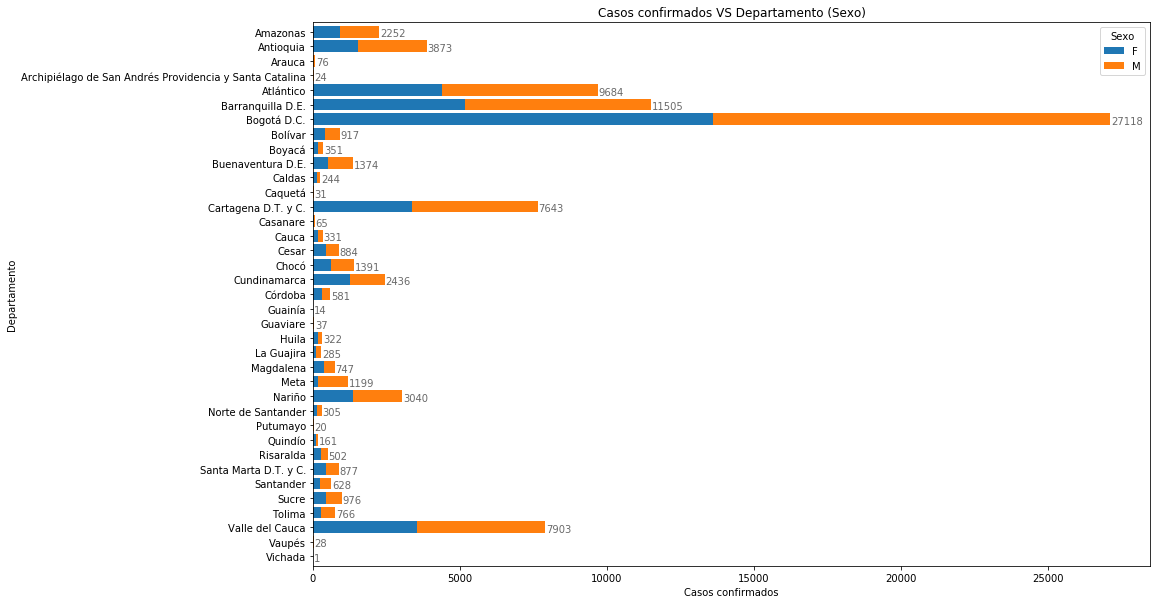

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Departamento,,,,,,,,,,
Amazonas,101,404,470,449,308,234,151,92,38,5
Antioquia,167,396,1057,967,538,424,191,80,46,7
Arauca,2,24,30,14,4,1,1,0,0,0
Archipiélago de San Andrés Providencia y Santa Catalina,0,1,9,6,5,2,1,0,0,0
Atlántico,438,730,2126,2275,1532,1264,713,401,174,31
Barranquilla D.E.,423,726,2535,2695,1752,1513,996,542,268,55
Bogotá D.C.,1551,2490,6181,5615,4190,3513,1979,1009,497,93
Bolívar,40,81,216,220,129,83,71,44,31,2
Boyacá,18,28,76,61,58,38,28,25,14,5


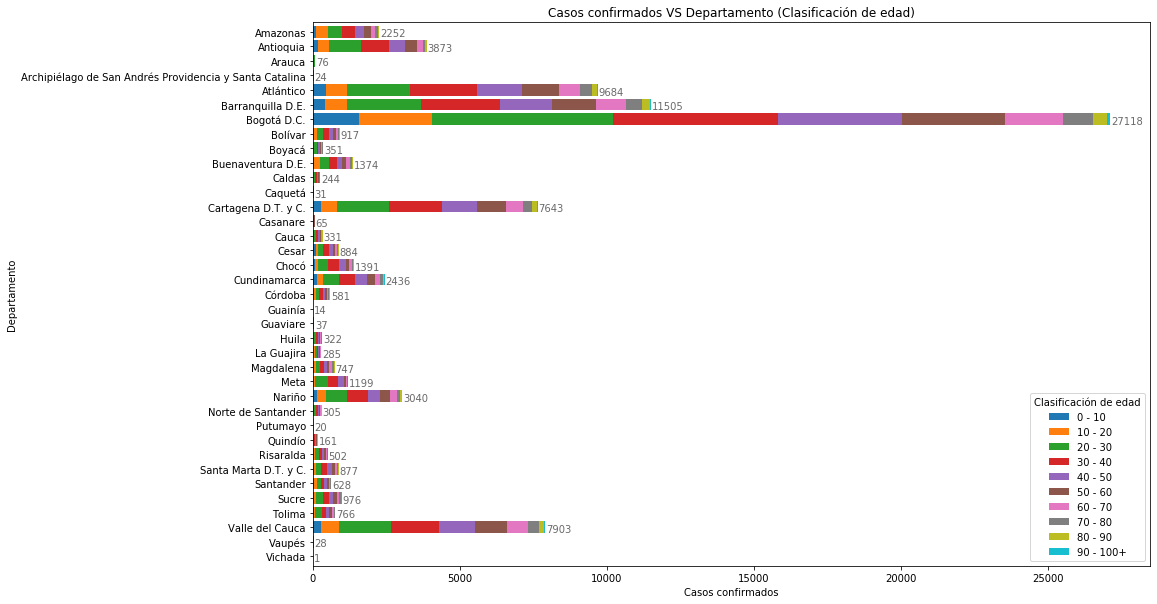

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Departamento,,,,,,
Amazonas,266.0,88.0,10.0,6.0,1.0,1881.0
Antioquia,2199.0,25.0,149.0,21.0,2.0,1477.0
Arauca,71.0,0.0,2.0,0.0,0.0,3.0
Archipiélago de San Andrés Providencia y Santa Catalina,6.0,0.0,0.0,0.0,1.0,17.0
Atlántico,5723.0,404.0,496.0,80.0,10.0,2971.0
Barranquilla D.E.,6749.0,574.0,744.0,118.0,34.0,3286.0
Bogotá D.C.,13229.0,602.0,1734.0,142.0,31.0,11380.0
Bolívar,549.0,35.0,65.0,7.0,1.0,260.0
Boyacá,107.0,11.0,20.0,2.0,5.0,206.0


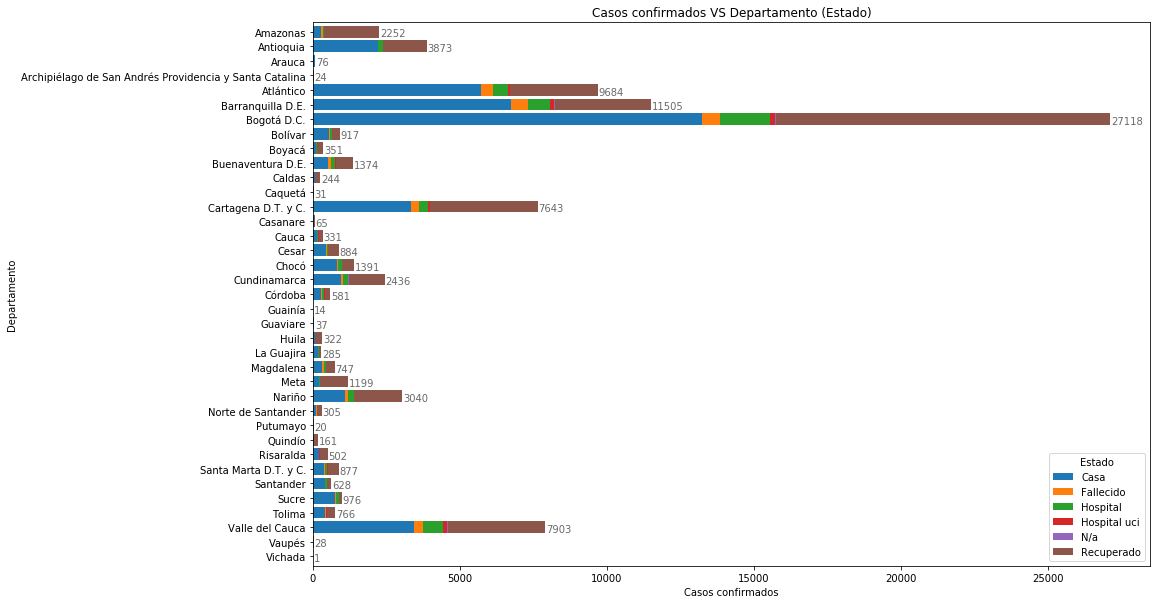

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Estado,,
Casa,19772,23385
Fallecido,1136,1803
Hospital,2345,3002
Hospital uci,268,471
N/a,61,75
Recuperado,17140,19133


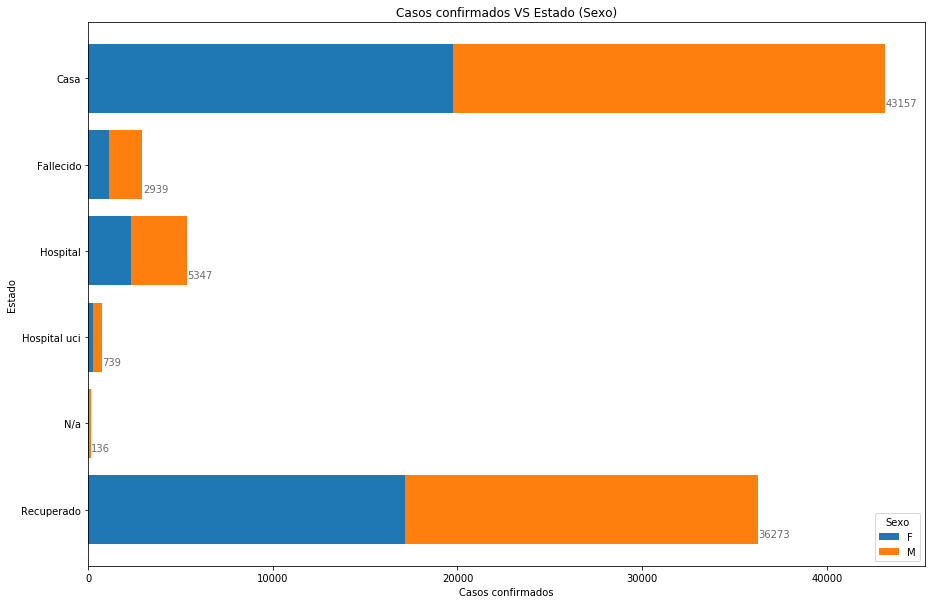

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Estado,,,,,,,,,,
Casa,2033,3927,10870,10457,6608,4985,2577,1152,464,84
Fallecido,10,7,43,107,260,436,723,713,517,123
Hospital,169,154,494,736,869,1101,862,605,304,53
Hospital uci,28,16,31,77,115,163,168,105,34,2
N/a,4,6,9,11,13,16,27,26,20,4
Recuperado,1884,3532,8802,8218,5579,4373,2306,1082,435,62


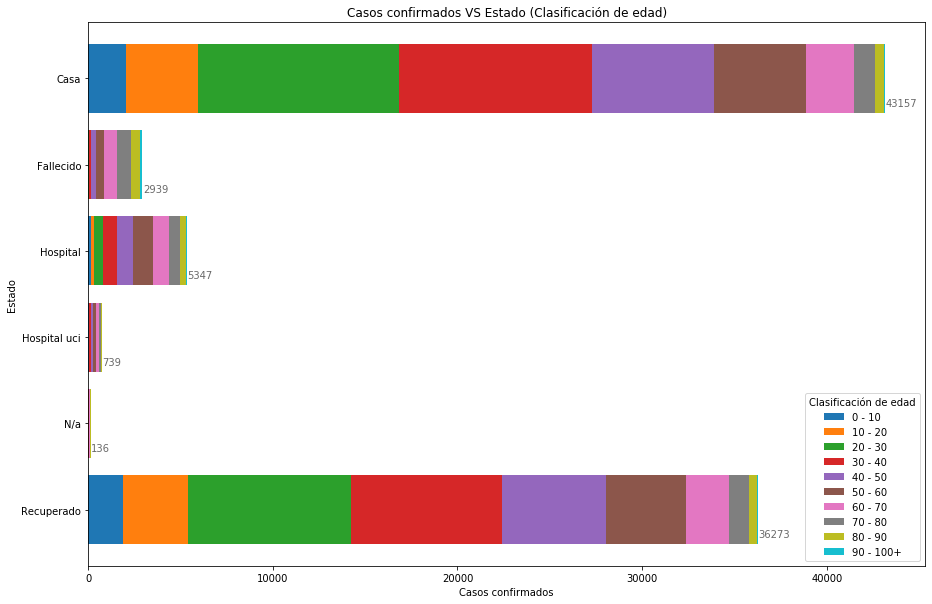

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Tipo,,
En estudio,36132,38903
Importado,427,489
Relacionado,4163,8477


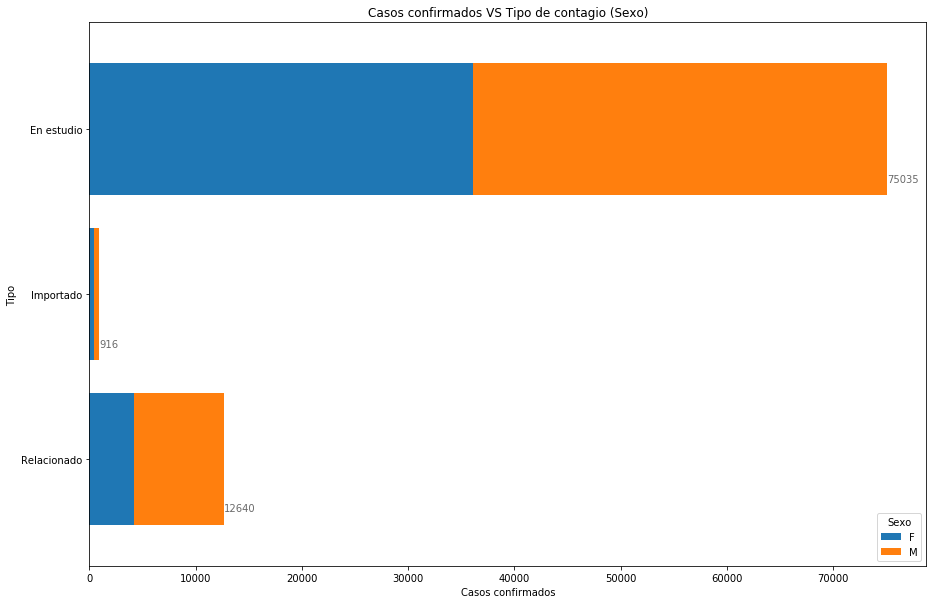

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Tipo,,,,,,,,,,
En estudio,3470,5896,16532,16432,11611,9768,6001,3386,1639,300
Importado,4,33,226,215,158,146,91,34,9,0
Relacionado,654,1713,3491,2959,1675,1160,571,263,126,28


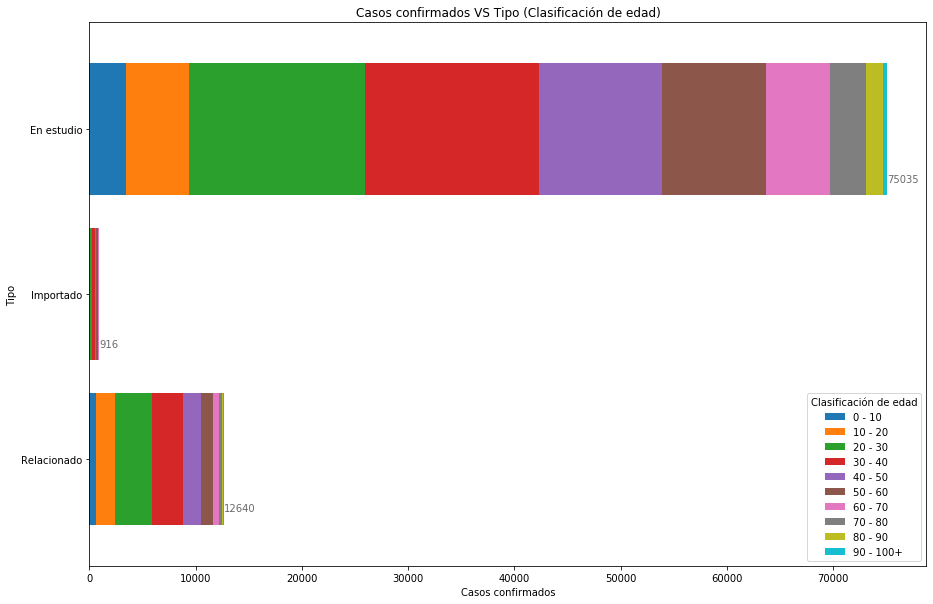

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Clasificación de edad,,
0 - 10,2118,2010
10 - 20,3377,4265
20 - 30,9225,11024
30 - 40,8886,10720
40 - 50,6211,7233
50 - 60,5011,6063
60 - 70,3111,3552
70 - 80,1681,2002
80 - 90,906,868


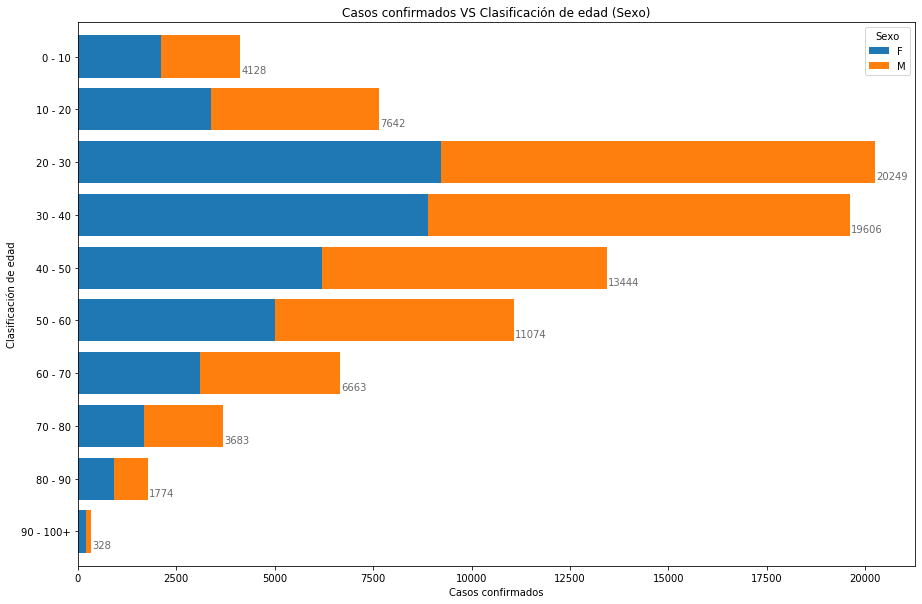

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Clasificación de edad,,,,,,
0 - 10,2033,10,169,28,4,1884
10 - 20,3927,7,154,16,6,3532
20 - 30,10870,43,494,31,9,8802
30 - 40,10457,107,736,77,11,8218
40 - 50,6608,260,869,115,13,5579
50 - 60,4985,436,1101,163,16,4373
60 - 70,2577,723,862,168,27,2306
70 - 80,1152,713,605,105,26,1082
80 - 90,464,517,304,34,20,435


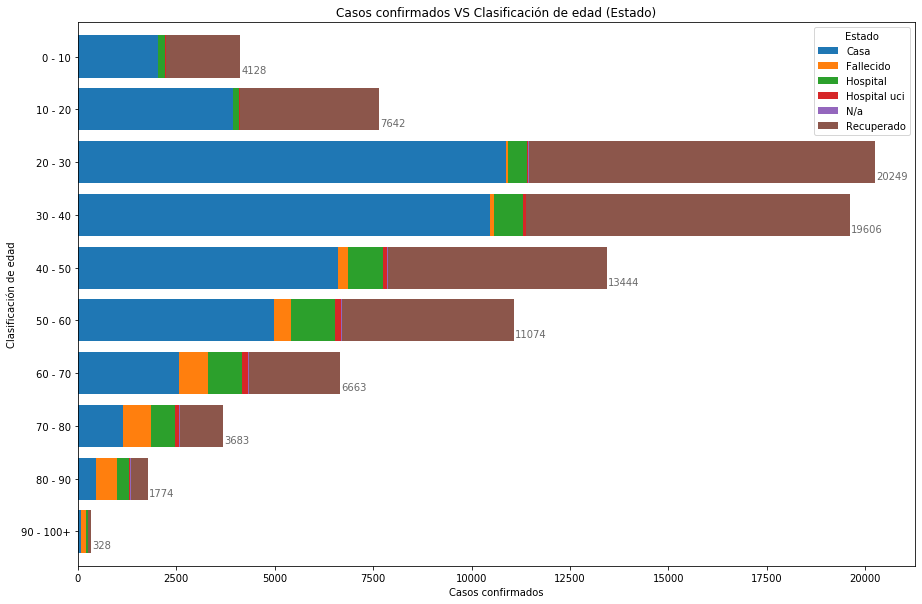

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06,1.0,0.0
2020-03-09,1.0,1.0
2020-03-11,4.0,2.0
2020-03-12,5.0,0.0
2020-03-13,2.0,3.0
...,...,...
2020-06-23,1474.0,1491.0
2020-06-24,1174.0,1273.0
2020-06-25,1431.0,1836.0


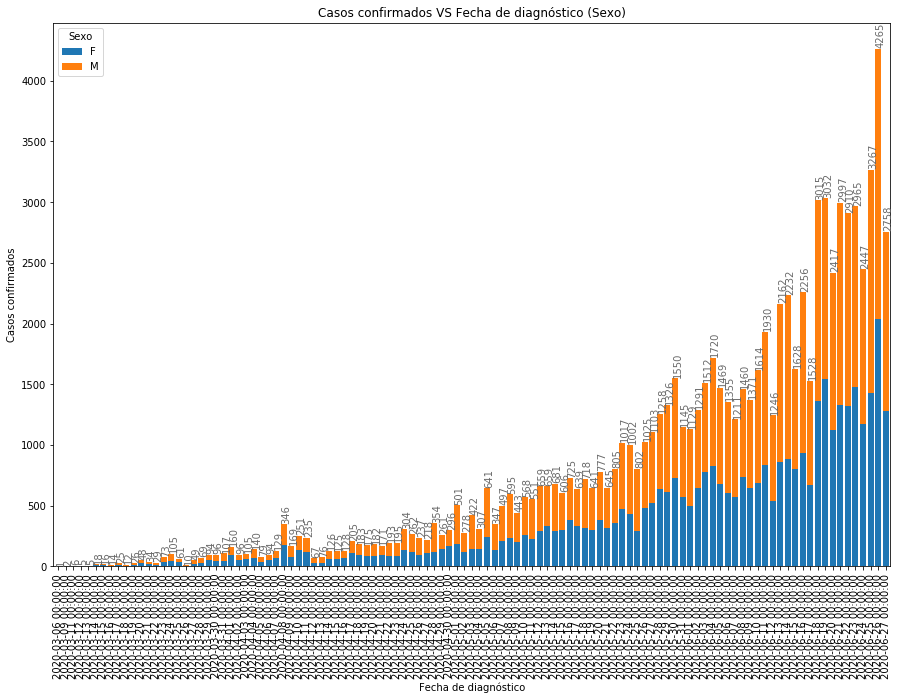

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06,0,1,0,0,0,0,0,0,0,0
2020-03-09,0,0,0,1,1,0,0,0,0,0
2020-03-11,0,0,4,0,0,1,0,0,1,0
2020-03-12,0,0,0,1,1,1,1,1,0,0
2020-03-13,0,0,1,0,2,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-06-23,134,238,689,656,451,380,217,129,62,9
2020-06-24,103,175,498,562,398,351,188,110,51,11
2020-06-25,134,261,719,741,497,424,256,148,78,9


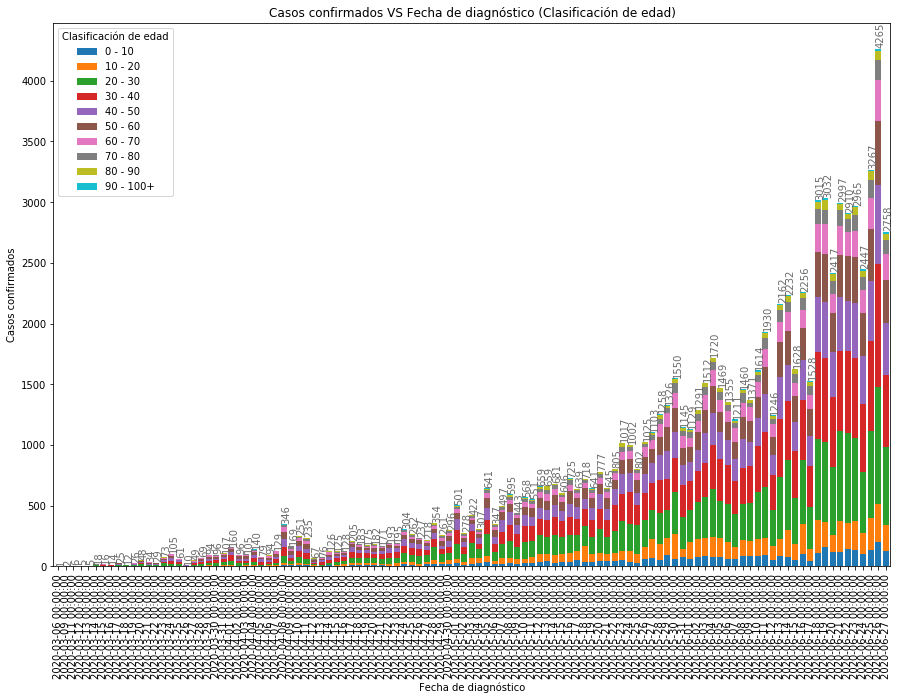

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Fecha de diagnóstico,,,,,,
2020-03-06,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-09,0.0,0.0,0.0,0.0,0.0,2.0
2020-03-11,0.0,0.0,0.0,0.0,0.0,6.0
2020-03-12,0.0,0.0,0.0,0.0,0.0,5.0
2020-03-13,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...
2020-06-23,2620.0,64.0,248.0,20.0,2.0,11.0
2020-06-24,2180.0,48.0,181.0,33.0,0.0,5.0
2020-06-25,2860.0,74.0,273.0,32.0,1.0,27.0


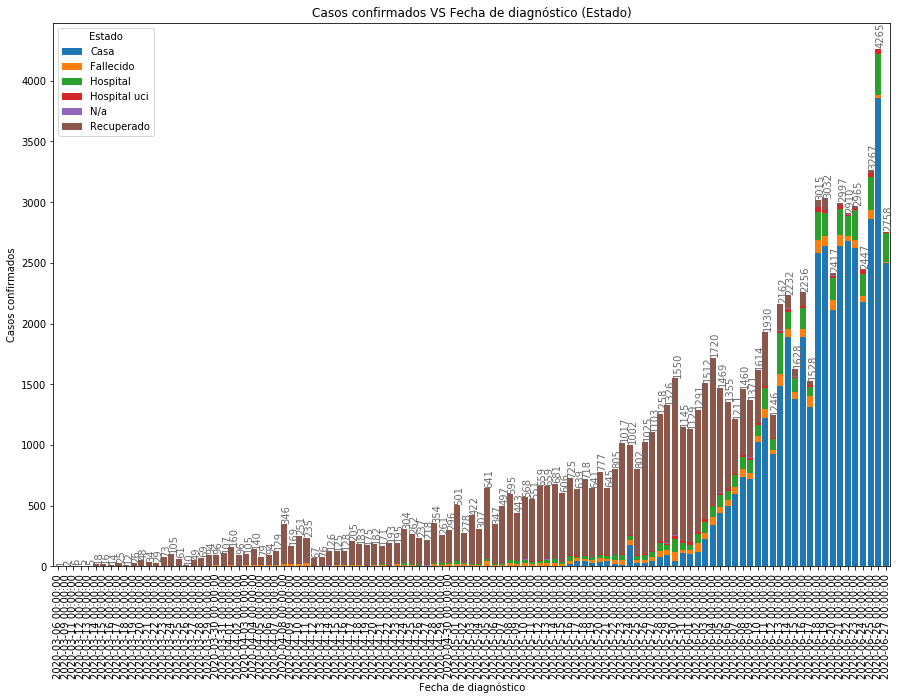

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06,1.0,0.0
2020-03-09,2.0,1.0
2020-03-11,6.0,3.0
2020-03-12,11.0,3.0
2020-03-13,13.0,6.0
...,...,...
2020-06-23,33892.0,39958.0
2020-06-24,35066.0,41231.0
2020-06-25,36497.0,43067.0


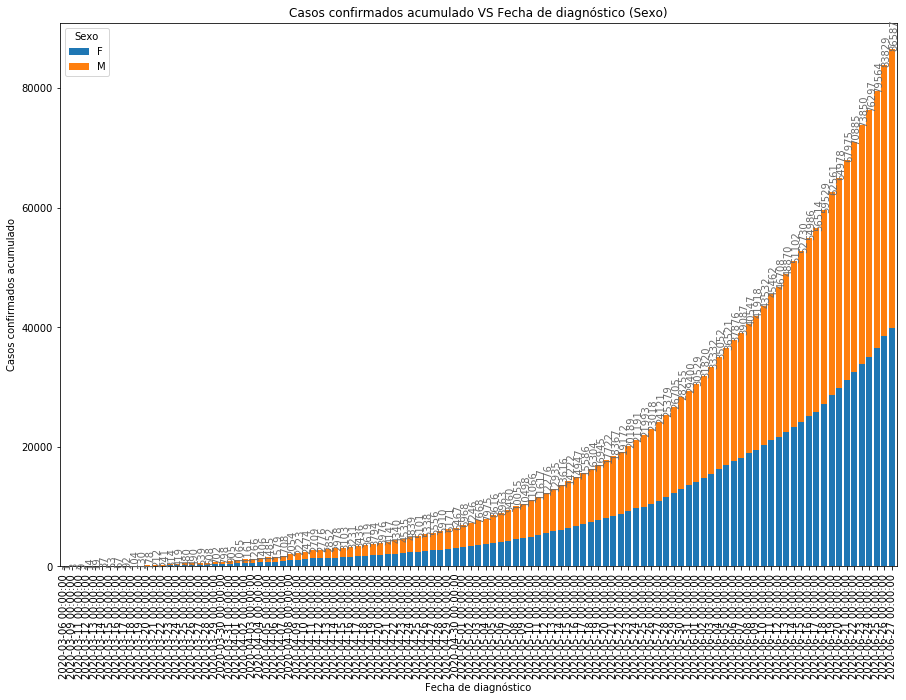

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06,0,1,0,0,0,0,0,0,0,0
2020-03-09,0,1,0,1,1,0,0,0,0,0
2020-03-11,0,1,4,1,1,1,0,0,1,0
2020-03-12,0,1,4,2,2,2,1,1,1,0
2020-03-13,0,1,5,2,4,2,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2020-06-23,3495,6497,16961,16213,11171,9194,5508,3068,1476,267
2020-06-24,3598,6672,17459,16775,11569,9545,5696,3178,1527,278
2020-06-25,3732,6933,18178,17516,12066,9969,5952,3326,1605,287


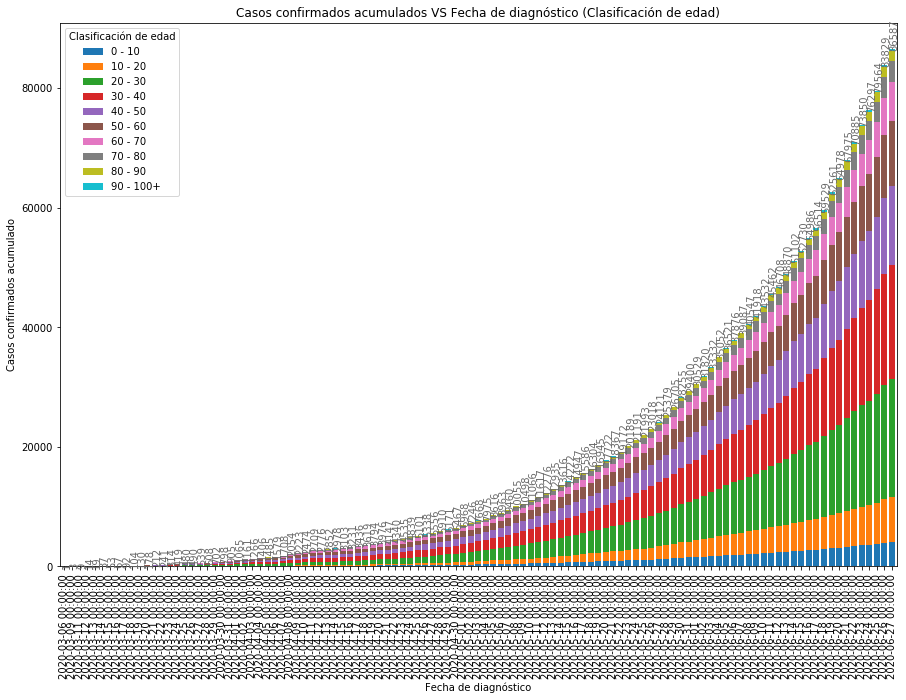

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Fecha de diagnóstico,,,,,,
2020-03-06,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-09,0.0,0.0,0.0,0.0,0.0,3.0
2020-03-11,0.0,0.0,0.0,0.0,0.0,9.0
2020-03-12,0.0,0.0,0.0,0.0,0.0,14.0
2020-03-13,0.0,0.0,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...
2020-06-23,30983.0,2725.0,4193.0,602.0,132.0,35215.0
2020-06-24,33163.0,2773.0,4374.0,635.0,132.0,35220.0
2020-06-25,36023.0,2847.0,4647.0,667.0,133.0,35247.0


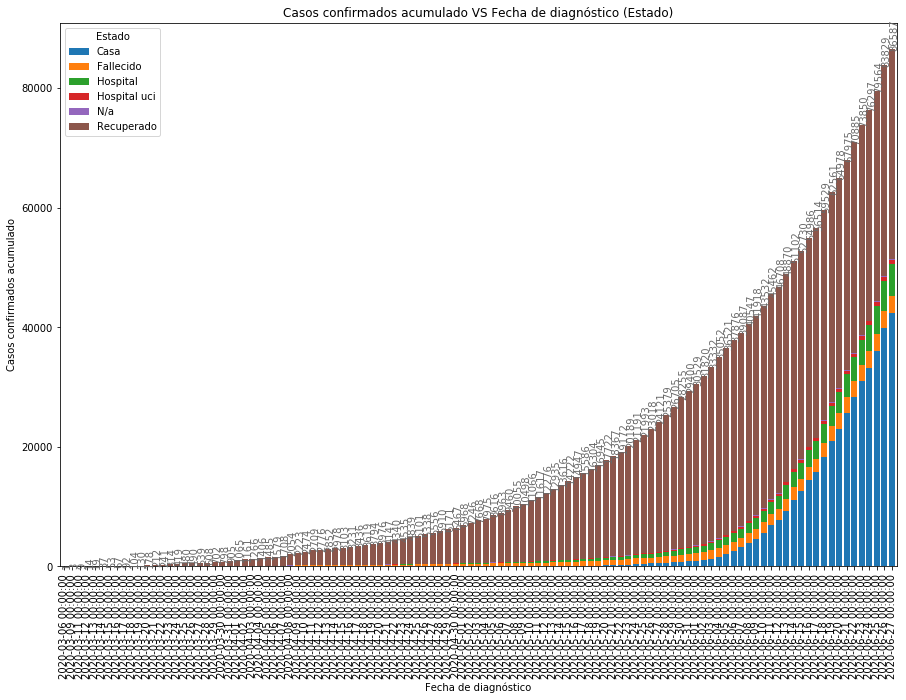

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuedateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>